Realizar un análisis no supervisado sobre el dataset 'analisis.csv' que contiene datos sobre famosos y que esta basado en una metodología de psicología conocida como “Ocean: The Big Five”. Disponemos de las siguientes características de entrada:
usuario (el nombre en Twitter)<br>
“op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte<br>
“co” =Conscientiousness – grado de orden, prolijidad, organización<br>
“ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social<br>
“ag” = Agreeableness – grado de empatía con los demás, temperamento<br>
“ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.<br>
Wordcount – Cantidad promedio de palabras usadas en sus tweets<br>
Categoria – Actividad laboral del usuario (actor, cantante, etc.)<br>
Eliminando la columna 'Categoría', realizar la tarea usando los 3 algoritmos de ANS: K-Means, DBScan y Jerárquico. Podemos suponer que, para 'profesiones' similares tendremos 'carácteres' similares. <br>
Se debe investigar los posibles clústers que se pueden generar. <br>
Es interesante realizar un EDA previo con los datos completos, para tener una idea inicial.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as sch

df = pd.read_csv('src/analisis.csv')

print(df.head())

print(df.info())

print(df.describe())

df.drop('categoria', axis=1) #Eliminamos la columna 'categoría'


           usuario         op         co         ex         ag         ne  \
0     3gerardpique  34.297953  28.148819  41.948819  29.370315   9.841575   
1  aguerosergiokun  44.986842  20.525865  37.938947  24.279098  10.362406   
2   albertochicote  41.733854  13.745417  38.999896  34.645521   8.836979   
3    AlejandroSanz  40.377154  15.377462  52.337538  31.082154   5.032231   
4   alfredocasero1  36.664677  19.642258  48.530806  31.138871   7.305968   

   wordcount  categoria  
0    37.0945          7  
1    78.7970          7  
2    49.2604          4  
3    80.4538          2  
4    47.0645          4  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float

,usuario,op,co,ex,ag,ne,wordcount
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645
...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107


Vamos a sacar una grafica para tratar de ver relaciones entre campos:

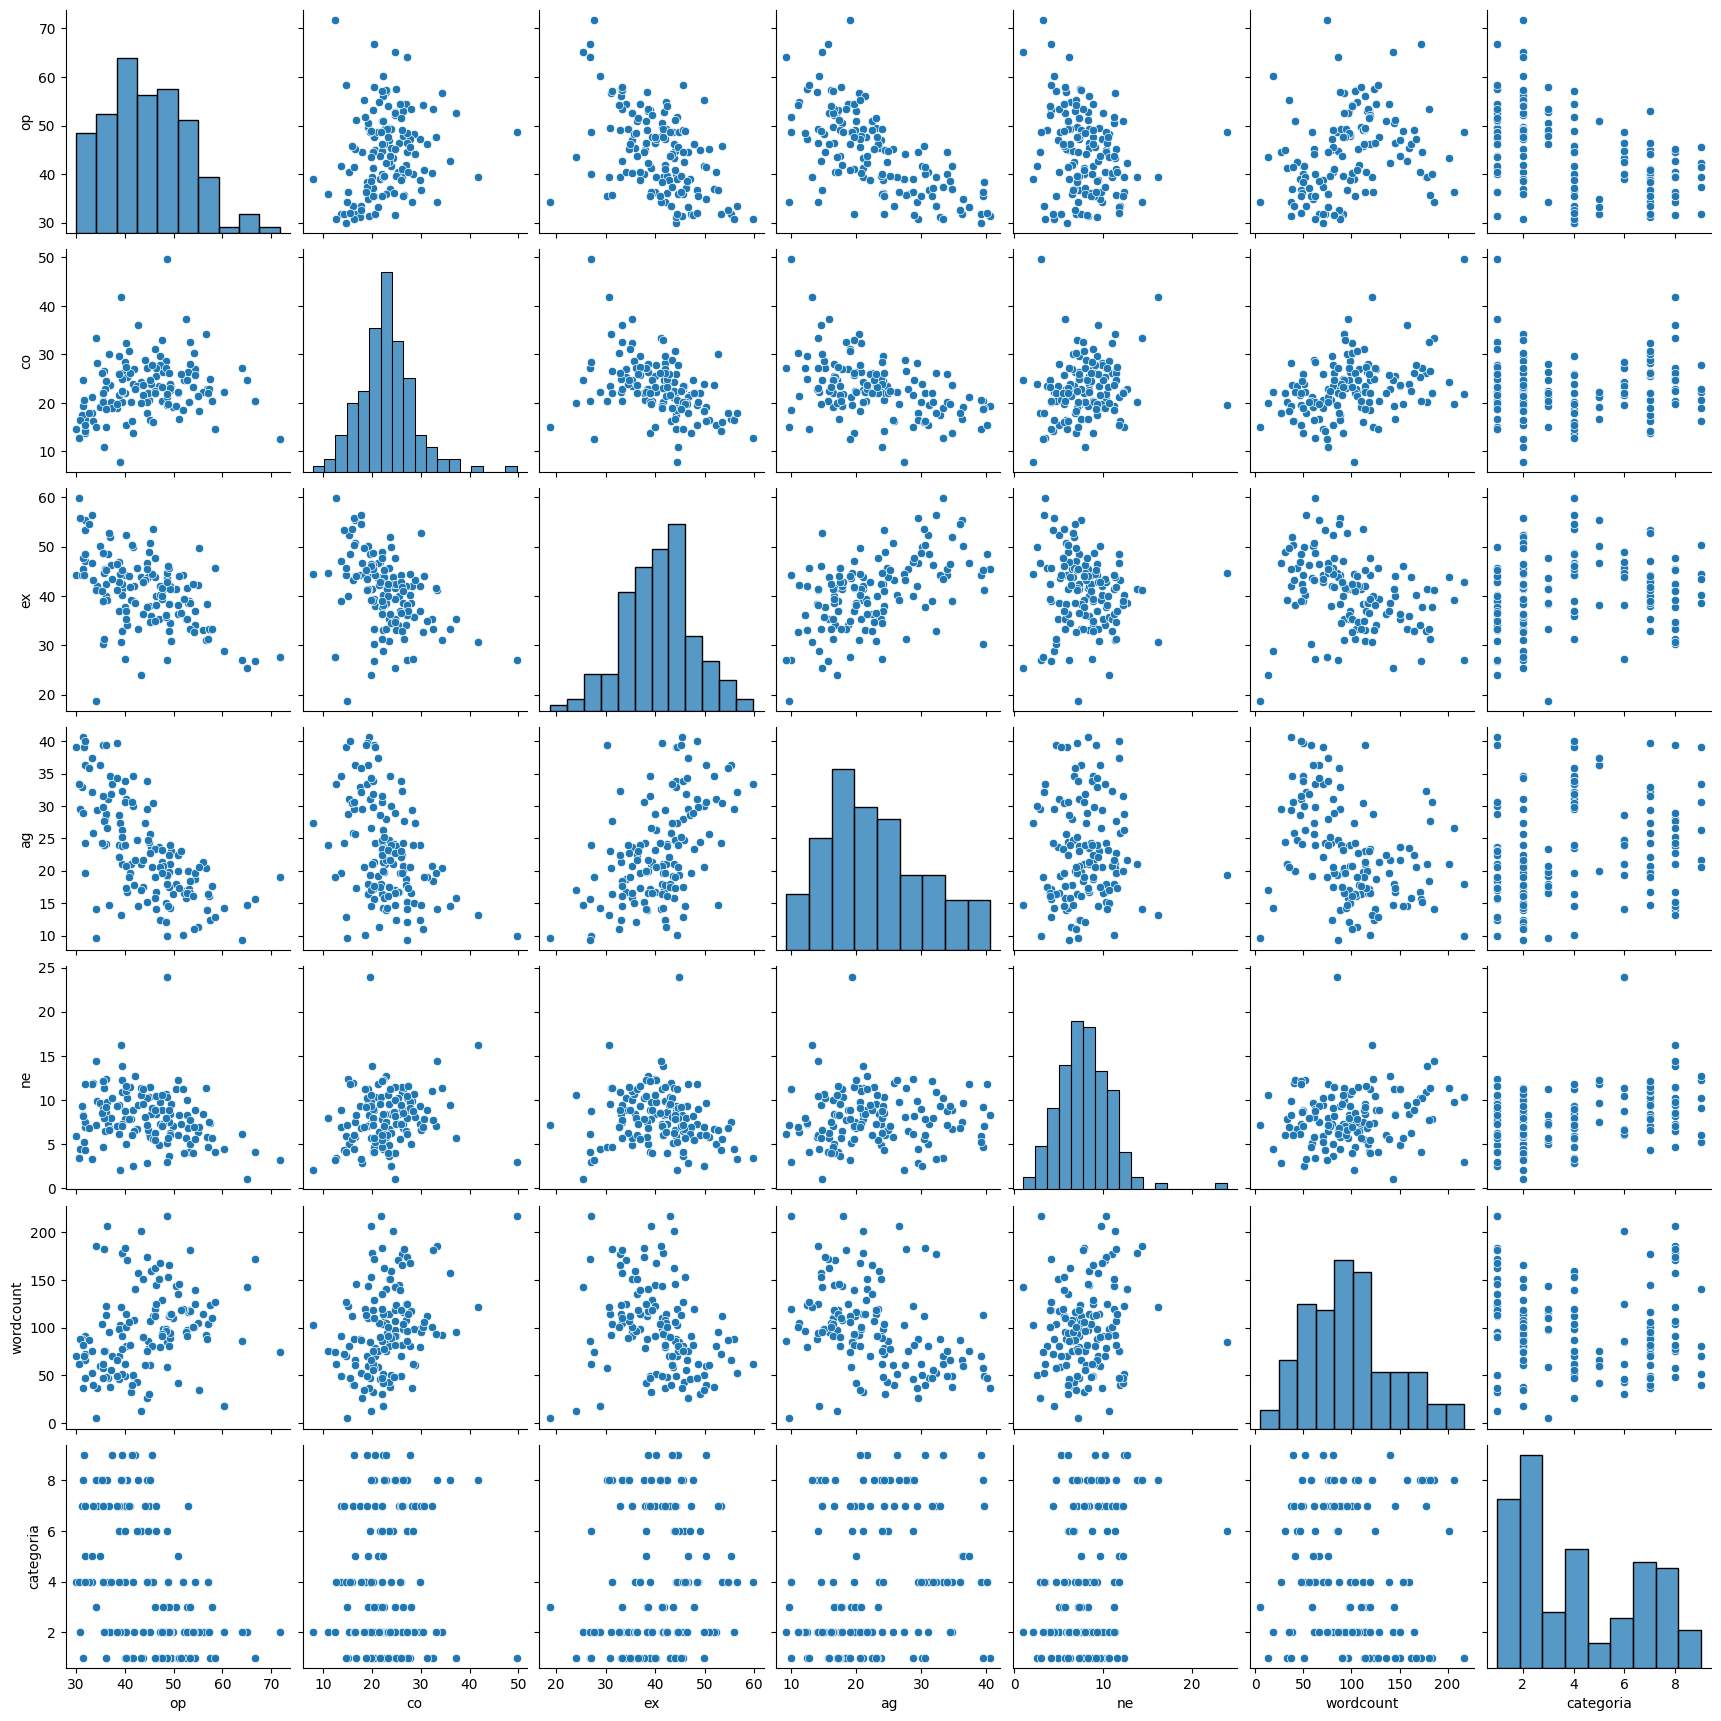

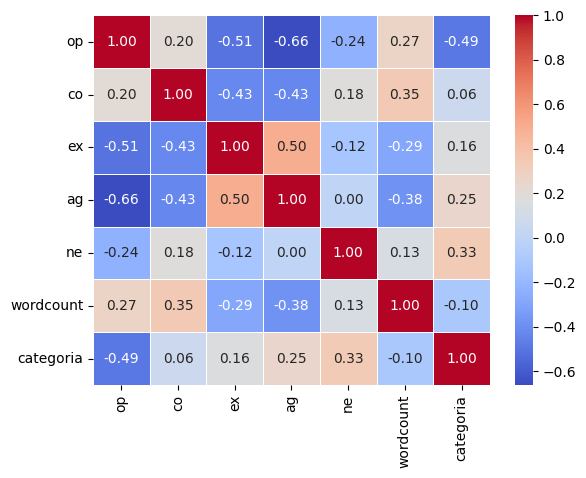

In [15]:
df= df.drop('usuario', axis=1)

sns.pairplot(df)
plt.show()

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.show()

Se puede observar (sobre todo en el mapa de calor) que las relaciones más fuertes serían entre los campos 'op', 'ex' y 'ag', así que voy a probar a lanzar el método del codo utilizando estas tres variables<br>
Comentar que he hecho pruebas con otras variables y el resultado no era muy distinto.

In [16]:
#Vamos a normalizar los datos:
scaler = MinMaxScaler()  # Normaliza entre 0 y 1
df_final = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

Vamos a ver el número de clusters:

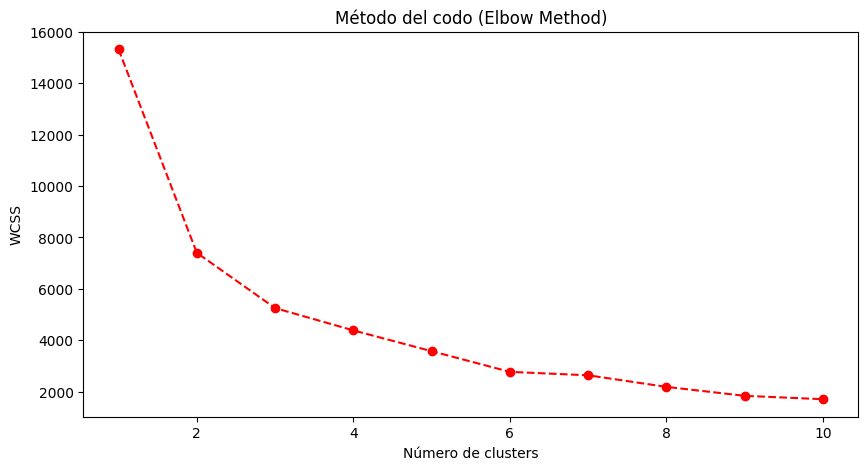

In [17]:

wcss = [] # vector para guardar la suma de los cuadrados de las distancias.
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) 
    kmeans.fit(df[['ex', 'ag']])                               
    wcss.append(kmeans.inertia_)      

plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, marker='o', linestyle='--', color='red') 
plt.title('Método del codo (Elbow Method)')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') #within cluster sum of squares - Suma de cuadrados dentro del cluster
plt.show()

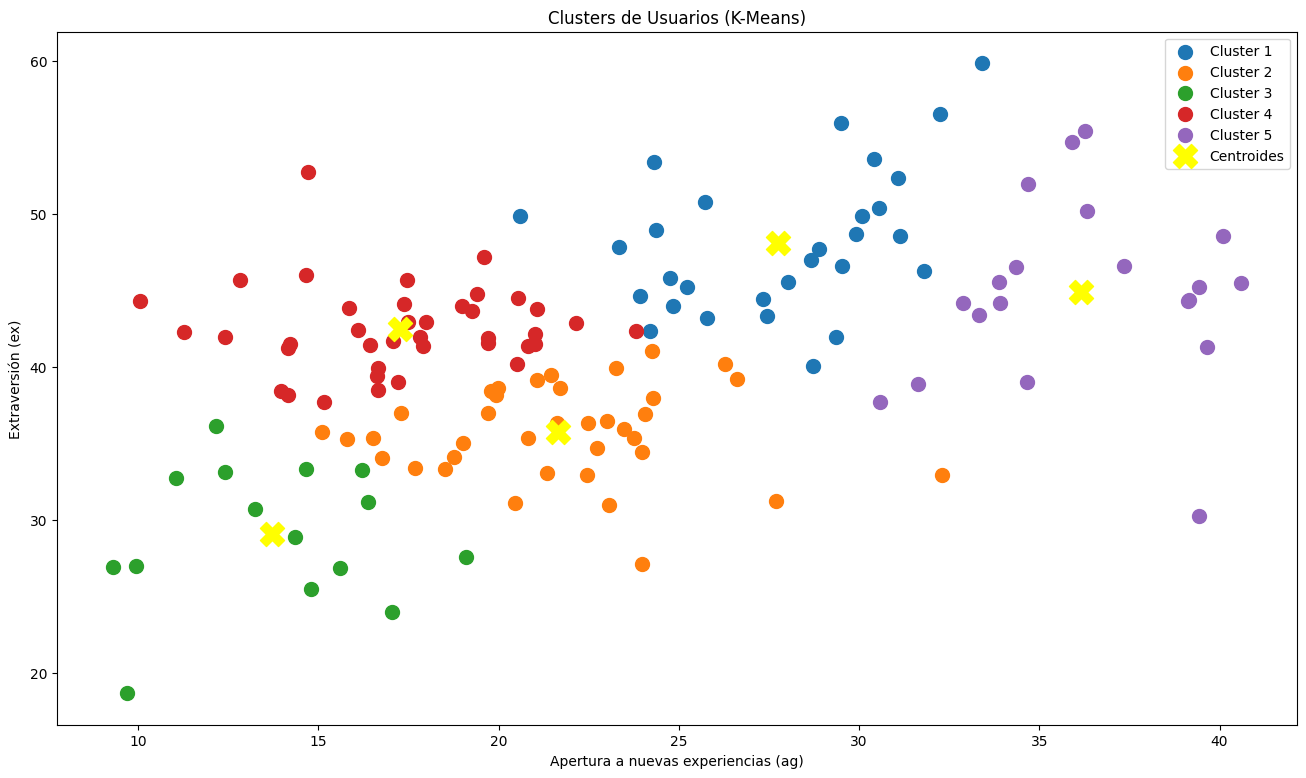

In [18]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df[['ag', 'ex']])  # Usamos las columnas 'op' y 'ex'

plt.figure(figsize=(16, 9))

for i in range(5):
    plt.scatter(df.iloc[y_kmeans == i, df.columns.get_loc('ag')], 
                df.iloc[y_kmeans == i, df.columns.get_loc('ex')],
                s=100, label=f'Cluster {i+1}')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, marker='X', c='yellow', label='Centroides')

plt.title('Clusters de Usuarios (K-Means)')
plt.xlabel('Apertura a nuevas experiencias (ag)')
plt.ylabel('Extraversión (ex)')
plt.legend()
plt.show()

He probado a lanzar este gráfico con la intención de buscar 4 clusters ya que 3 me parecían muy pocos y 5 estaba cerca del final del codo en la gráfica; pero creo que 5 clusters está más cerca de la solución.<br>
Voy a empezar con el modelo K-means:

/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


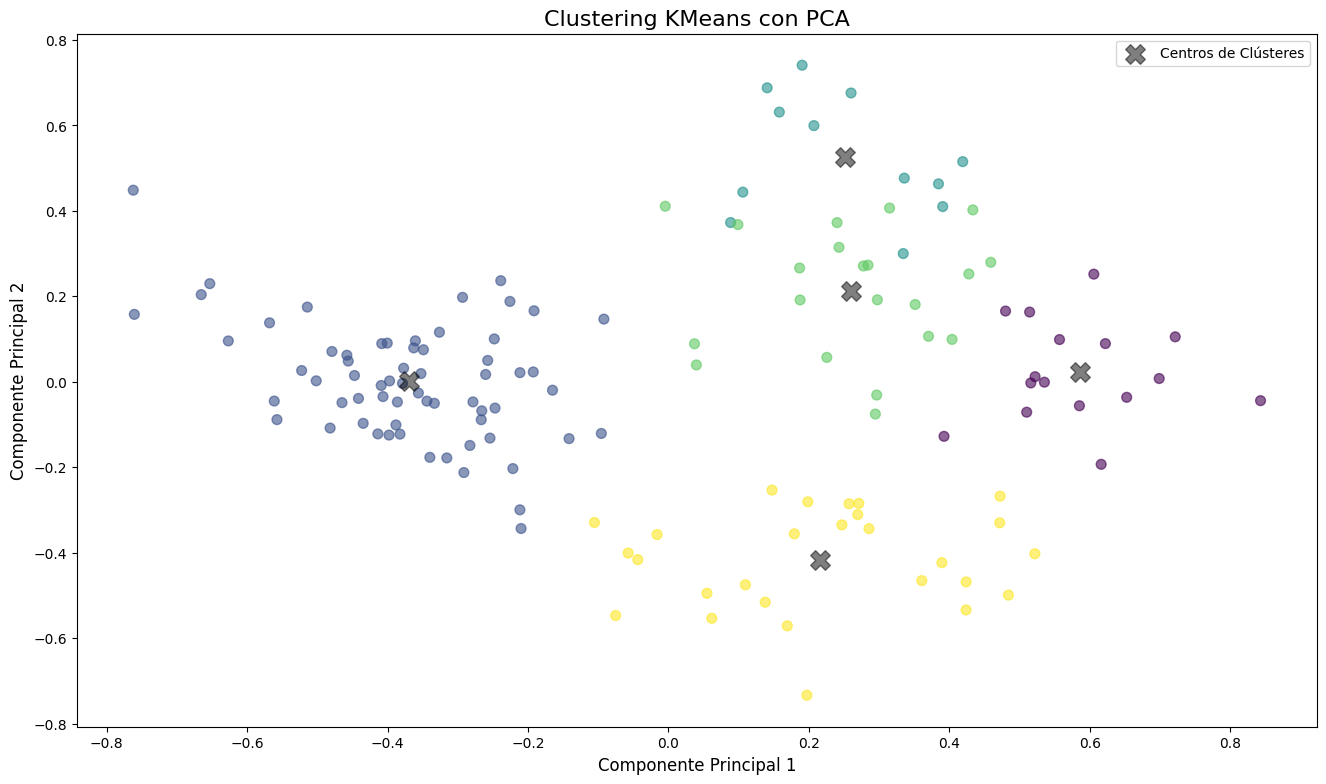

In [19]:
k_optimo = 5  
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df_final['KMeans_cluster'] = kmeans.fit_predict(df_final)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_final.drop(columns=['KMeans_cluster']))  # Eliminar la columna de clústeres para el PCA

# Crear un DataFrame con las 2 componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])

# Añadir la columna de clústeres al DataFrame
df_pca['KMeans_cluster'] = df_final['KMeans_cluster']

# Crear el gráfico de dispersión para los puntos de los clústeres
plt.figure(figsize=(16, 9))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['KMeans_cluster'], s=50, cmap='viridis', alpha=0.6)

# Obtener los centros de los clústeres (en el espacio PCA)
centers = pca.transform(kmeans.cluster_centers_)

# Graficar los centros de los clústeres (puntos negros)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, marker='X', label="Centros de Clústeres")

# Título y etiquetas
plt.title("Clustering KMeans con PCA", fontsize=16)
plt.xlabel("Componente Principal 1", fontsize=12)
plt.ylabel("Componente Principal 2", fontsize=12)

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Ahora con DB-SCAN:

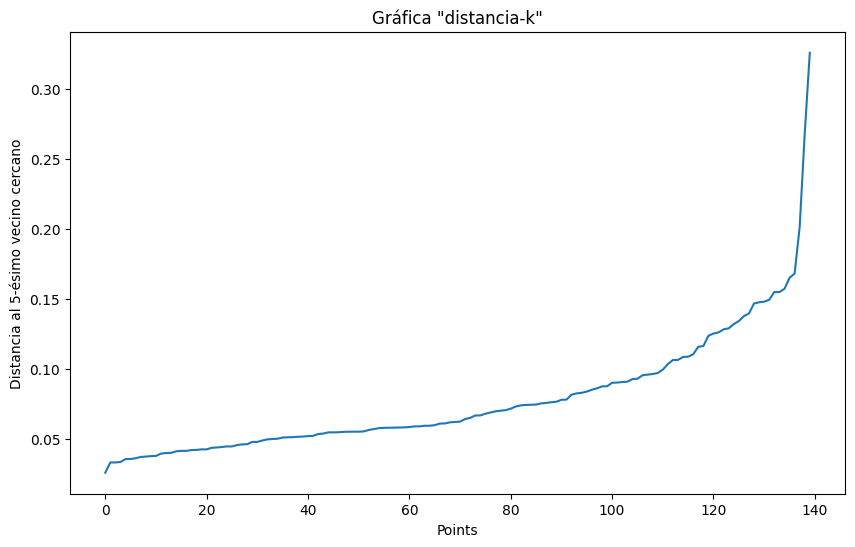

In [20]:
X = df_final[['ag', 'ex']].values

def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k) # Definimos el número de vecinos cercanos, usamos el algoritmo "nearest neighbors"
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X) # Obtenemos las distancias a los k vecinos más cercanos
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'Distancia al {k}-ésimo vecino cercano')
    plt.title('Gráfica "distancia-k"')
    plt.show()

# Pinto la gráfica de distancia-k
plot_k_distance_graph(X, k=5)

DBSCAN_cluster
 4    62
 2    27
 1    20
 0    16
 3    12
-1     3
Name: count, dtype: int64


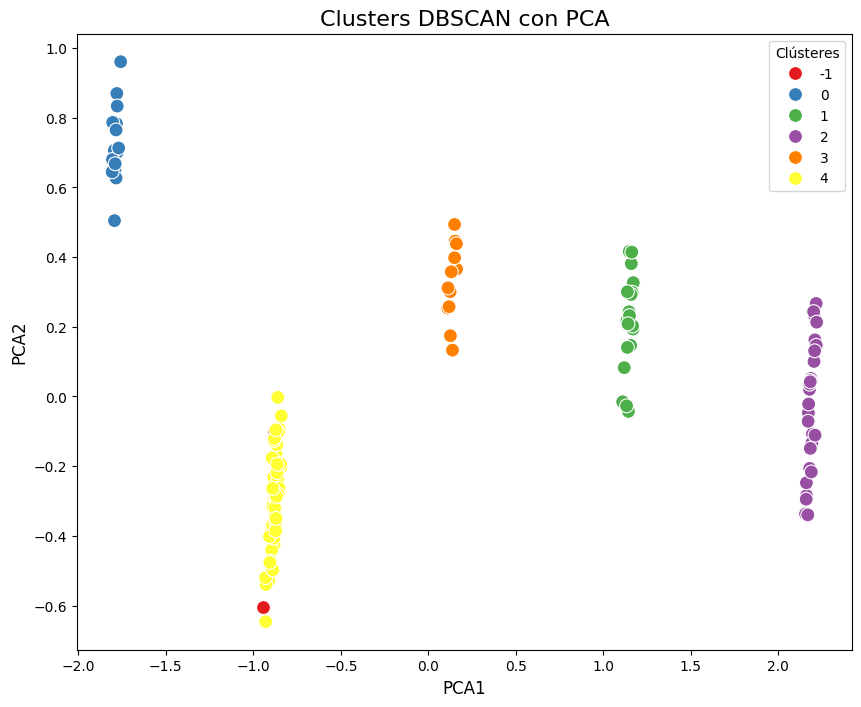

In [21]:
from sklearn.cluster import DBSCAN

# Ajustar DBSCAN (probar diferentes valores de eps y min_samples)
dbscan = DBSCAN(eps=0.5, min_samples=5)     #He empezado probando con eps=0.15 basándome en el gráfico anterior donde se estima que el valor de eps debería estar sobre el valor 0.15 pero con ese valor no obtenía ningún número de clusters claro; así que he ido aumentando el valor hasta que he conseguido un valor más adecuado (5 clusters)
df_final['DBSCAN_cluster'] = dbscan.fit_predict(df_final)

# Ver los resultados
print(df_final['DBSCAN_cluster'].value_counts())

#Representación gráfica del resultado
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_final.drop('DBSCAN_cluster', axis=1))  # Eliminar la columna 'DBSCAN_cluster'

# Crear un DataFrame con los resultados de PCA
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Añadir la columna de clústeres de DBSCAN al DataFrame PCA
df_pca['DBSCAN_cluster'] = df_final['DBSCAN_cluster']

# Graficar los resultados
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='DBSCAN_cluster', palette='Set1', marker='o', s=100)

# Título y etiquetas
plt.title('Clusters DBSCAN con PCA', fontsize=16)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)

# Mostrar leyenda
plt.legend(title='Clústeres')
plt.show()

Como se puede observar con el método DB-SCAN conseguimos sacar 5 clústers con pocos casos de ruido

Ahora vamos a probar con el algoritmo de clustering jerárquico:


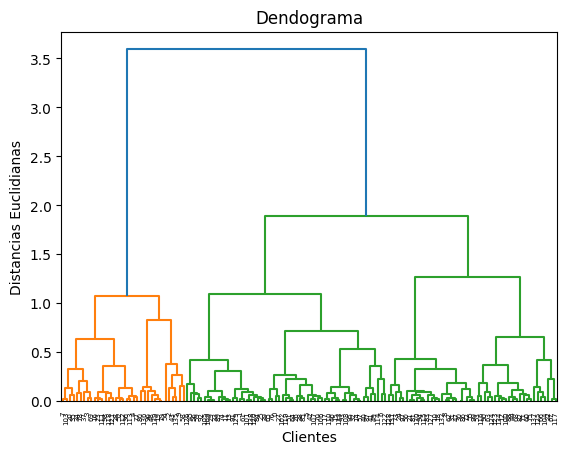

In [22]:

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclidianas')
plt.show()
agg_clustering = AgglomerativeClustering(n_clusters=3)
df_final['Agglomerative_cluster'] = agg_clustering.fit_predict(df_final) 


Basándome en este gráfico donde se ve una distribución de los datos en diferentes clústers, interpreto que tendríamos 6 clústers.<br>
En general con los 3 tipos de algoritmos de ANS (K-Means, DBScan y Jerárquico) Considero que el número de clusteres debería de estar entre 5 y 6.